### Thuto Wesley Sephai  
## March 2025
### Machine Learning and Deep Learning
## Capstone Project Guidelines

Developing a machine learning model to detect diabetes. [Diabetes prediction 
using machine learning]

Dataset: Use the Diabetes Dataset for model training and evaluation. 

Steps to Follow: 
1. Load the dataset into your environment. [Read the date from the given 
csv file] 
2. Perform data cleaning and transformation as needed. [Handle nul 
values, outliers, convert categorical features to numeri al values]  
3. Split the dataset into training and testing sets. 
4. Select and apply an appropriate machine learning model. 
5. Evaluate the model and fine-tune if neceidance.) 

In [4]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [6]:
# Loading dataset
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Data Cleaning and Transformation and checking for Null Values

In [9]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

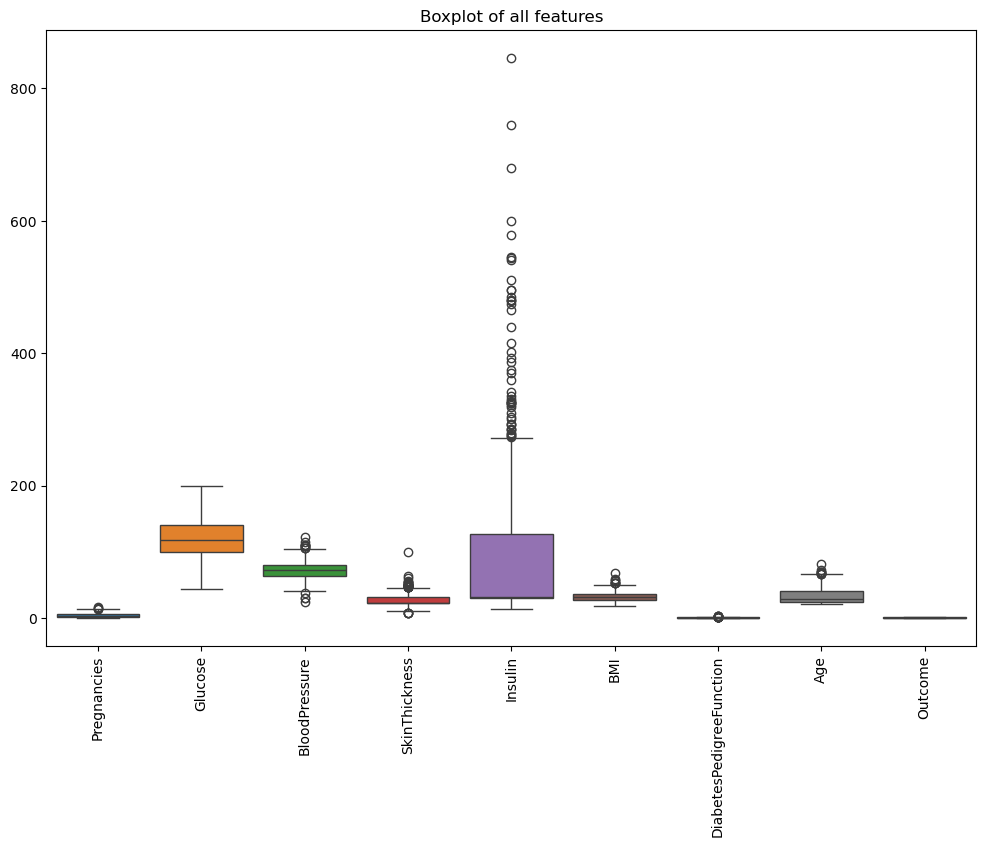

In [29]:
# Handling Outliers and confirm visualize with Boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of all features")
plt.show()

In [31]:
# There are some values that can't be zero, let's replace zero values in features that can't be zero
cols_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_to_replace:
    df[col] = df[col].replace(0, df[col].median())

Spliting the Dataset into Train and Test Sets

In [33]:
X = df.drop('Outcome', axis=1)  # Features
y = df['Outcome']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Apply a Machine Learning Model. Let's use Random Forest as a starting point:

In [35]:
# First import sklearn.esemble to import Randon Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting the model
y_pred = model.predict(X_test)

Evaluating the model

Accuracy: 0.7532467532467533

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154


Confusion Matrix:
 [[79 20]
 [18 37]]


<Axes: title={'center': 'Feature Importances'}>

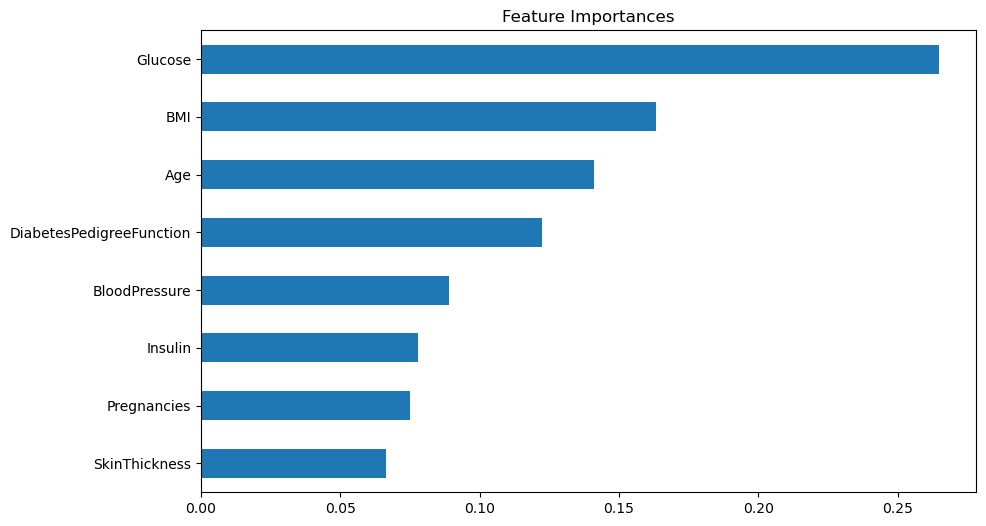

In [21]:
# Evaluate the Model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Feature Importance (Optional)
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(10,6), title="Feature Importances")

Fine-Tune: let's use Hyperparameter Tuning

In [39]:
# Import GridSearchCv from sklearn
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# The best model
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Best Parameters: {'max_depth': 20, 'n_estimators': 50}
Tuned Accuracy: 0.7727272727272727
